### 1. Load data from csv file

In [0]:
import numpy as np

TRAIN_DATA_PATH = './data_train.csv'
TEST_DATA_PATH = './data_test.csv'

# load train/test data
train_data = np.genfromtxt(TRAIN_DATA_PATH, delimiter=',', dtype=np.str)
train_data = np.char.strip(train_data, '"').astype(np.float64)

test_data = np.genfromtxt(TEST_DATA_PATH, delimiter=',', dtype=np.str)
test_data = np.char.strip(test_data, '"').astype(np.float64)

# separate features from answer
x_train = train_data[:, 0:-1]
y_train = train_data[:, -1].reshape(-1, 1)

x_test = test_data[:, 0:-1]
y_test = test_data[:, -1].reshape(-1, 1)

# save mean and std of train data for converting to original theta
x_train_mean = np.mean(x_train, axis=0)
y_train_mean = np.mean(y_train, axis=0)
x_train_std = np.std(x_train, axis=0)
y_train_std = np.std(y_train, axis=0) 

### 2. Data normalization


In [0]:
def normalize(data):
  return (data - np.mean(data, axis=0)) / np.std(data, axis=0)

# normalize train/test data
x_train = normalize(x_train)
y_train = normalize(y_train)

x_test = normalize(x_test)
y_test = normalize(y_test)

### 3. Define functions for linear regression



In [0]:
def linear(theta, x):
  m = len(x)
  temp_x = np.concatenate((np.ones((m, 1)), x), axis=1)
  return np.matmul(temp_x, theta.T)

def objective(y_hat, y):
  m = len(y)
  return (1 / (2 * m)) * np.sum((y_hat - y) ** 2, axis=0)

def gradient(x, y_hat, y):
  m = len(x)
  temp_x = np.concatenate((np.ones((m, 1)), x), axis=1)
  return (1 / m) * np.matmul((y_hat - y).T, temp_x)

### 4. Learning with the gradient descent algorithm


In [0]:
# initialize model parameters and learning rate
feature_cnt = x_train.shape[1]
theta = np.zeros((1, feature_cnt + 1))

lr = 0.3
epoch_count = 20000

history = {
    'theta': np.zeros((epoch_count, theta.shape[1])),
    'train_err': np.zeros(epoch_count),
    'test_err': np.zeros(epoch_count)
}

for epoch in range(epoch_count):
  # calculate training error
  y_hat_train = linear(theta, x_train)
  train_err = objective(y_hat_train, y_train)

  # calculate testing error
  y_hat_test = linear(theta, x_test)
  test_err = objective(y_hat_test, y_test)

  # logging history
  history['theta'][epoch] = np.squeeze(theta)
  history['train_err'][epoch] = train_err
  history['test_err'][epoch] = test_err

  # gradient descent using the training dataset
  grad_theta = gradient(x_train, y_hat_train, y_train)
  theta -= lr * grad_theta

### 5. Plot the results


5-1. Estimated parameters

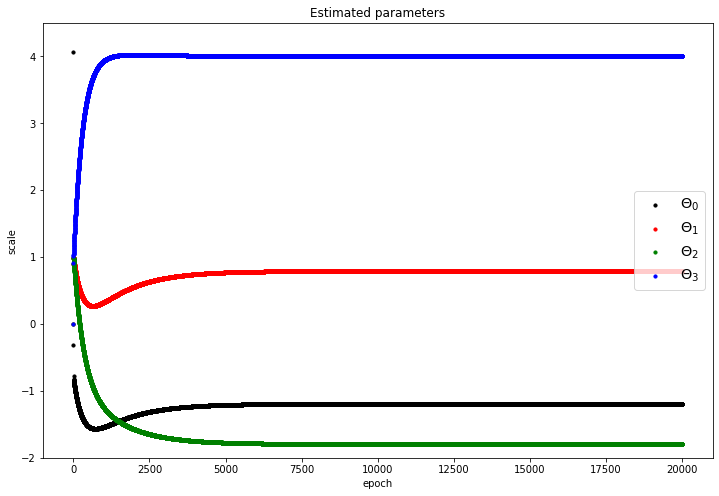

In [175]:
import matplotlib.pyplot as plt

epoch_tick = np.arange(epoch_count)

# convert theta to original values
history_theta0 = y_train_mean + y_train_std * (history['theta'][:, 0] - np.sum((history['theta'][:, 1:] * x_train_mean) / x_train_std, axis=1))
history_theta_others = (history['theta'][:, 1:] * y_train_std) / x_train_std

#plot
plt.figure(figsize=(12, 8))
plt.title('Estimated parameters')
plt.scatter(epoch_tick, history_theta0, c='k', s=10)
plt.scatter(epoch_tick, history_theta_others[:, 0], c='r', s=10)
plt.scatter(epoch_tick, history_theta_others[:, 1], c='g', s=10)
plt.scatter(epoch_tick, history_theta_others[:, 2], c='b', s=10)
plt.legend(['$\Theta_0$', '$\Theta_1$', '$\Theta_2$', '$\Theta_3$'], fontsize='x-large', loc='center right')
plt.xlabel('epoch')
plt.ylabel('scale')
plt.ylim(-2, 4.5)
plt.show()

5-2. Training error

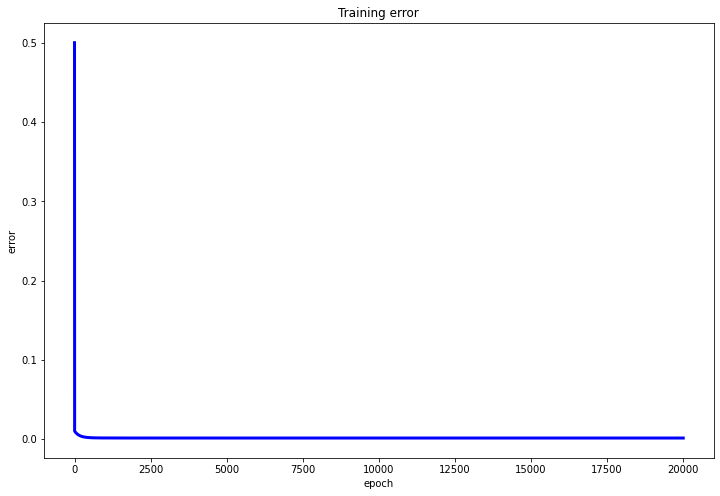

In [176]:
plt.figure(figsize=(12, 8))
plt.title('Training error')
plt.plot(epoch_tick, history['train_err'], 'b-', linewidth=3)
plt.xlabel('epoch')
plt.ylabel('error')
plt.show()

5-3. Testing error

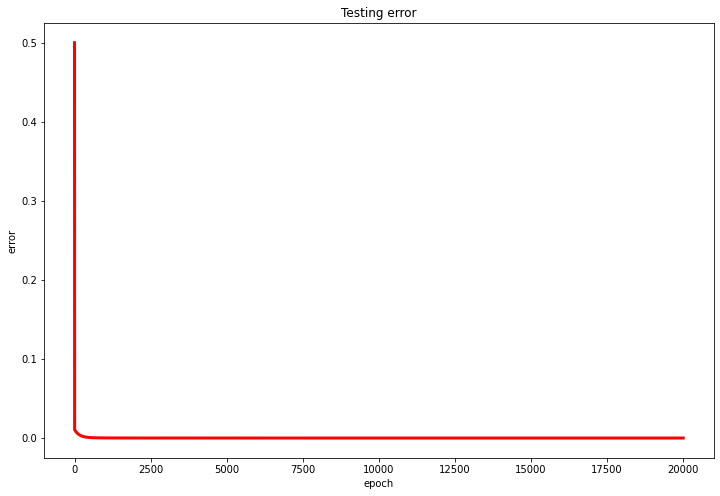

In [177]:
plt.figure(figsize=(12, 8))
plt.title('Testing error')
plt.plot(epoch_tick, history['test_err'], 'r-', linewidth=3)
plt.xlabel('epoch')
plt.ylabel('error')
plt.show()